<a href="https://colab.research.google.com/github/yousefMohamed2002/Level-2-Tasks---Codveda-Technology--ML-intern/blob/main/Task_2_Decision_Trees_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

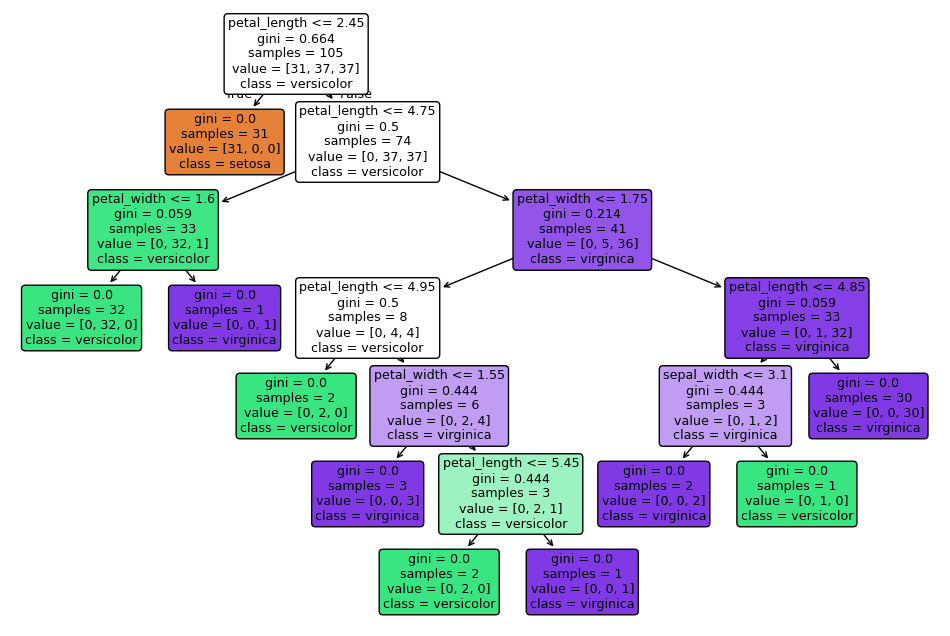

Accuracy: 1.0
F1-score: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Pruned Tree Accuracy: 1.0
Pruned Tree F1-score: 1.0


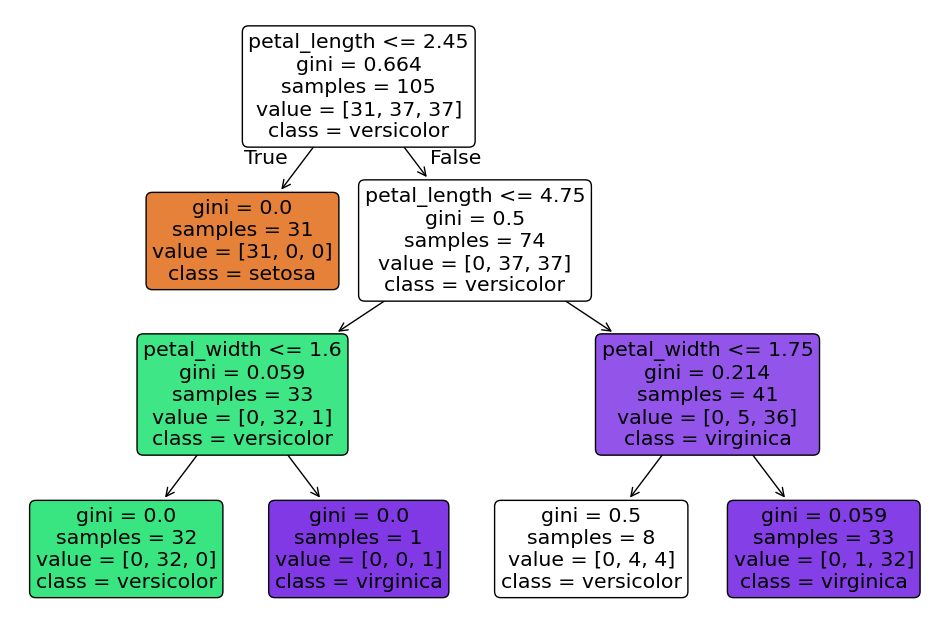

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/1) iris.csv")
X = df.drop("species", axis=1)
y = df["species"]

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns,
          class_names=le.classes_,
          filled=True, rounded=True)
plt.show()

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

clf_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_pruned.fit(X_train, y_train)

y_pred_pruned = clf_pruned.predict(X_test)
print("\nPruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))
print("Pruned Tree F1-score:", f1_score(y_test, y_pred_pruned, average="weighted"))

plt.figure(figsize=(12,8))
plot_tree(clf_pruned, feature_names=X.columns,
          class_names=le.classes_,
          filled=True, rounded=True)
plt.show()
